#### Problem Statement: 
    Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.
Dataset: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input?select=housing.csv

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Preprocessing

In [2]:
pd.read_csv("housing.csv")

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
df = pd.read_csv('housing.csv', delimiter=r"\s+", names=column_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()
# df[col].fillna(df[col].mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.shape

(506, 14)

In [10]:
corr_matrix = round(df.corr(),2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<AxesSubplot:>

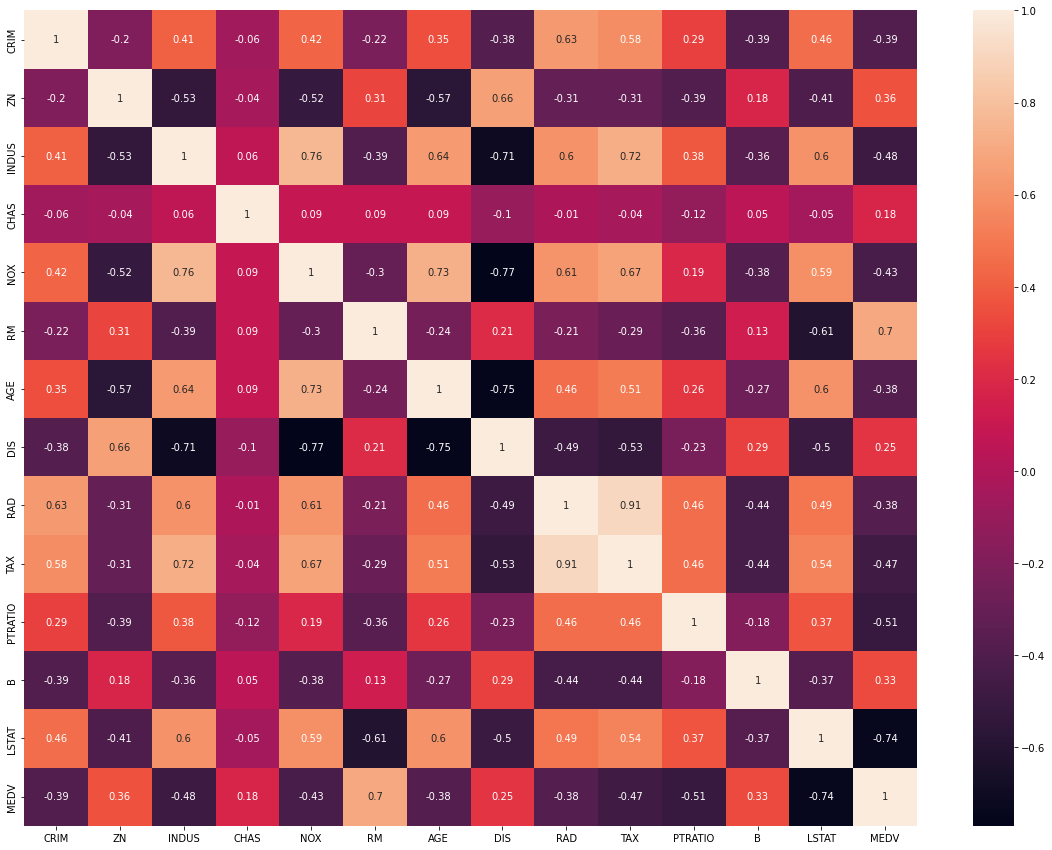

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)

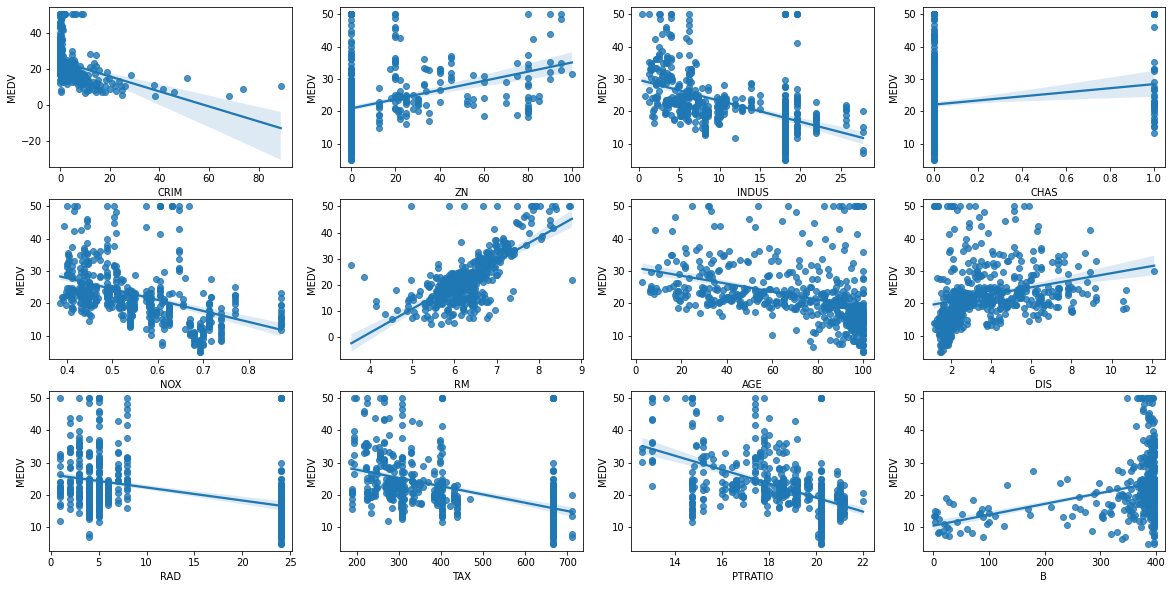

In [12]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
y = df['MEDV']
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(cols):
    sns.regplot(x=df[k], y=y, ax=axs[i])

In [13]:
x = df.loc[:, df.columns != 'MEDV']
y = df['MEDV']

In [14]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [15]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Train and Test Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [18]:
x_train.shape

(404, 13)

In [19]:
x_test.shape

(102, 13)

In [20]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666.0,20.2,3.65,17.16


In [21]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19


In [22]:
ss = preprocessing.StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [23]:
x_train[0:5]

array([[-0.3892494 , -0.49559343, -0.60928978, -0.29329423, -0.89958293,
        -0.14496758, -2.15002959,  0.89445528, -0.74632984, -1.00850765,
        -0.24857777,  0.28674182, -0.96685016],
       [-0.38783184,  0.57923879, -0.86952633, -0.29329423, -0.85675635,
        -0.17983229, -1.35782026,  1.88290285, -0.16959446, -0.70641281,
         0.58214721,  0.36669519, -0.82116789],
       [ 1.43554993, -0.49559343,  1.02669166, -0.29329423,  1.25887674,
        -1.44077268,  1.05736657, -1.13295032,  1.67595875,  1.55633679,
         0.81290414,  0.43472666,  2.50177533],
       [-0.39855822, -0.49559343,  0.25621604, -0.29329423, -0.9938014 ,
        -0.05344772, -0.49900927,  0.5608029 , -0.51563569, -0.03114198,
         0.12063333,  0.31988255, -0.06084519],
       [ 0.55768291, -0.49559343,  1.02669166, -0.29329423,  0.26530007,
        -1.02239615,  0.09339504, -0.83205893,  1.67595875,  1.55633679,
         0.81290414, -3.86645878,  0.60790581]])

In [24]:
x_test[0:5]

array([[-0.3993398 ,  0.92318511, -1.30081723, -0.29329423, -0.69401534,
         0.8428659 ,  0.08287899, -0.30372877, -0.28494154, -1.07366536,
        -0.01782083,  0.43472666, -0.72820873],
       [-0.40195489,  1.86903747, -1.06689674, -0.29329423, -0.59123155,
         0.62060336, -0.4043648 ,  0.89974236, -0.51563569, -0.19699798,
        -0.38703193,  0.43472666, -0.77676949],
       [-0.37964173, -0.49559343, -0.60928978, -0.29329423, -0.89958293,
        -0.34689237,  0.61569234,  0.87958538, -0.74632984, -1.00850765,
        -0.24857777,  0.38922651,  0.83544764],
       [-0.39840169,  0.04182268, -0.73209804, -0.29329423, -1.23363026,
        -0.56770221, -1.63123764,  1.26129353, -0.63098277, -0.34508368,
         0.21293611,  0.42717976, -0.64912407],
       [-0.00210554, -0.49559343,  1.02669166, -0.29329423,  1.85844887,
        -1.31729349,  0.9907649 , -0.8131293 ,  1.67595875,  1.55633679,
         0.81290414,  0.25852298, -0.35914698]])

In [25]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Neural Network Model

In [27]:
reg_model = Sequential()

# The Input Layer :
reg_model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))

# The Hidden Layers :
reg_model.add(Dense(256, activation='relu'))
reg_model.add(Dense(256, activation='relu'))
reg_model.add(Dense(256, activation='relu'))

# The Output Layer :
reg_model.add(Dense(1, activation='linear'))

In [28]:
# Compile the network :
reg_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [29]:
# model summary
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Train the model
history = reg_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 42ms/step - loss: 19.6772 - mean_absolute_error: 19.6772 - val_loss: 11.7519 - val_mean_absolute_error: 11.7519
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 9.2261 - mean_absolute_error: 9.2261 - val_loss: 5.6683 - val_mean_absolute_error: 5.6683
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 5.2651 - mean_absolute_error: 5.2651 - val_loss: 4.5402 - val_mean_absolute_error: 4.5402
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 4.1221 - mean_absolute_error: 4.1221 - val_loss: 3.5845 - val_mean_absolute_error: 3.5845
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 3.2753 - mean_absolute_error: 3.2753 - val_loss: 3.2973 - val_mean_absolute_error: 3.2973
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 2.8969 - mean_absolute_error: 2.8969 - val_loss: 3.0026 - val_mean_absolute_error: 3.0026
Epoch 7/100
11/11

Epoch 51/100
11/11 [==============================] - 0s 8ms/step - loss: 1.3484 - mean_absolute_error: 1.3484 - val_loss: 2.2529 - val_mean_absolute_error: 2.2529
Epoch 52/100
11/11 [==============================] - 0s 8ms/step - loss: 1.5109 - mean_absolute_error: 1.5109 - val_loss: 2.6196 - val_mean_absolute_error: 2.6196
Epoch 53/100
11/11 [==============================] - 0s 8ms/step - loss: 1.6605 - mean_absolute_error: 1.6605 - val_loss: 2.5832 - val_mean_absolute_error: 2.5832
Epoch 54/100
11/11 [==============================] - 0s 8ms/step - loss: 1.5153 - mean_absolute_error: 1.5153 - val_loss: 2.3299 - val_mean_absolute_error: 2.3299
Epoch 55/100
11/11 [==============================] - 0s 8ms/step - loss: 1.4284 - mean_absolute_error: 1.4284 - val_loss: 2.0636 - val_mean_absolute_error: 2.0636
Epoch 56/100
11/11 [==============================] - 0s 8ms/step - loss: 1.2884 - mean_absolute_error: 1.2884 - val_loss: 2.1636 - val_mean_absolute_error: 2.1636
Epoch 57/100
11/

In [31]:
y_pred = reg_model.predict(x_test).flatten()

In [32]:
y_pred

array([28.908573 , 22.24203  , 19.577126 , 20.581995 , 22.828798 ,
       18.84041  , 28.820087 , 15.710007 , 19.285345 , 23.659098 ,
       23.79041  , 26.526487 , 18.731382 , 19.964834 , 18.93622  ,
       23.926554 , 10.835293 , 47.59343  , 23.287336 , 16.267576 ,
       16.677858 , 17.49727  , 22.14212  , 22.973581 , 26.07266  ,
       10.1856365, 14.30283  , 18.54389  , 38.72369  , 12.529425 ,
       22.736284 , 15.096588 , 51.16892  , 15.787865 , 17.915655 ,
       24.343431 , 15.034659 , 29.798542 , 11.6781025, 18.035261 ,
       21.029238 , 21.233103 , 25.554056 , 18.782583 , 15.719774 ,
       10.429285 , 45.95134  , 14.547909 , 22.96337  , 17.691778 ,
       21.270664 , 18.52508  , 23.329971 , 22.07701  ,  9.702127 ,
       22.987658 , 12.195105 , 23.910505 , 16.399061 , 44.664013 ,
       14.655075 , 25.473005 , 13.511258 , 16.489595 , 23.474077 ,
       35.815517 , 45.84434  , 19.36469  , 22.214354 , 18.375517 ,
       21.58595  ,  8.295849 , 17.893824 , 19.089815 , 20.1601

In [33]:
df_preds = pd.DataFrame({'Actual: ': y_test, 'Predicted: ': y_pred})
df_preds

,Actual:,Predicted:
0,28.2,28.908573
1,23.9,22.242029
2,16.6,19.577126
3,22.0,20.581995
4,20.8,22.828798
...,...,...
97,22.9,24.537207
98,44.8,44.582188
99,21.7,24.233110
100,10.2,13.071035


### Evaluating Performace

In [34]:
# Evaluate the model on the testing data
MAE = reg_model.evaluate(x_test, y_test)
print('Mean Squared Error:', MAE)

4/4 [==============================] - 0s 4ms/step - loss: 2.0963 - mean_absolute_error: 2.0963
Mean Squared Error: [2.096325635910034, 2.096325635910034]


In [35]:
print("For test data")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('accuracy:', r2_score(y_test, y_pred))

For test data
MSE: 7.160779778922236
MAE: 2.0963258911581604
RMSE: 2.675963336617719
accuracy: 0.9275425586201942
